In [1]:
import openeo
from openeo.local import LocalConnection
local_conn = LocalConnection('')

Did not load machine learning processes due to missing dependencies: Install them like this: `pip install openeo-processes-dask[implementations, ml]`
Did not load experimental processes due to missing dependencies. Install them like this: `pip install openeo-processes-dask[implementations, experimental]`


<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - Client Side Processing

## Data Fusion


In this interactive notebook we will show some usage examples of the Client Side Processing functionality of the openEO Python client, interacting with STAC Catalogs from different providers.

## Requirements

To use this functionality, you need `Python>=3.9`.

You can install it using:
    `pip install openeo[localprocessing]`

<div class="alert alert-block alert-warning">
This functionality is still under development and the installation procedure might change.
Please refer to official documentation page for the most up to date instructions:
    
<a href="url">https://open-eo.github.io/openeo-python-client/cookbook/localprocessing.html</a>

## Sentinel-2 and Landsat-8 data

We are going to work with the Landsat-8 data provided by the Microsoft Planetary Computer and Sentinel-2 data provided by the element84.

We load only the data of our area of interest, selecting the red and near infrared bands for a limited period of time.
We also set the conditions on the cloud coverage, which must be less than 50%.

### Load the Sentinel-2 data

In [2]:
url = "https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a"

spatial_extent = {"west": 11.4, "east": 11.42, "south": 45.5, "north": 45.52}
temporal_extent = ["2023-06-01", "2023-07-30"]
bands = ["red","nir"]

properties = {"eo:cloud_cover": dict(lt=50)}
s2_cube = local_conn.load_stac(url=url,
   spatial_extent=spatial_extent,
   temporal_extent=temporal_extent,
   bands=bands,
   properties=properties,
)

s2_cube.execute()

C:\Users\mclaus\Documents\GitHub\openeo-python-client\openeo\metadata.py:256: UserWarning: No cube:dimensions metadata
  complain("No cube:dimensions metadata")
C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
Deserialised process graph into nested structure


Walking node root-50ebb0a7-0c23-4754-a7d9-dedf47340cad


C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-834e06dadea642915fb8bf3a43d32cc7' (time: 8,
                                                                band: 2,
                                                                y: 227, x: 163)>
dask.array<getitem, shape=(8, 2, 227, 163), dtype=float64, chunksize=(1, 1, 227, 163), chunktype=numpy.ndarray>
Coordinates: (12/49)
  * time                                     (time) datetime64[ns] 2023-06-02...
    id                                       (time) <U24 'S2A_32TPR_20230602_...
  * band                                     (band) <U3 'red' 'nir'
  * x                                        (x) float64 6.874e+05 ... 6.891e+05
  * y                                        (y) float64 5.044e+06 ... 5.041e+06
    s2:vegetation_percentage                 (time) float64 43.68 ... 58.91
    ...                                       ...
    title                                    (band) <U20 'Red (band 4) - 10m'...
    gsd                                      int32 10
    common_name                              (band) <U3 'red' 'nir'
    center_wavelength                        (band) float64 0.665 0.842
    full_width_half_max                      (band) float64 0.038 0.145
    epsg                                     int32 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(600000.0, 4990200.0, 709800.0...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 5100000.00|\n| 0.0...
    resolution:  10.0

### Load the Landsat-8 data

In [3]:
url = "https://planetarycomputer.microsoft.com/api/stac/v1/collections/landsat-c2-l2"
temporal_extent = ["2023-06-01", "2023-07-30"]
spatial_extent = {"west": 11.4, "east": 11.42, "south": 45.5, "north": 45.52}
bands = ["red","nir08"]
properties = {"eo:cloud_cover": dict(lt=50)}
l8_cube = local_conn.load_stac(url=url,
                    spatial_extent=spatial_extent,
                    temporal_extent=temporal_extent,
                    bands=bands,
                    properties=properties)
l8_cube.execute()

C:\Users\mclaus\Documents\GitHub\openeo-python-client\openeo\metadata.py:256: UserWarning: No cube:dimensions metadata
  complain("No cube:dimensions metadata")
C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
Deserialised process graph into nested structure


Walking node root-5c3cdc84-5e9a-48c5-87c6-1d01083e294c


C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-a802ed274cd7e1652003595bc67cbb7e' (time: 15,
                                                                band: 2, y: 75,
                                                                x: 54)>
dask.array<getitem, shape=(15, 2, 75, 54), dtype=float64, chunksize=(1, 1, 75, 54), chunktype=numpy.ndarray>
Coordinates: (12/25)
  * time                         (time) datetime64[ns] 2023-06-11T07:50:54.32...
    id                           (time) <U31 'LE07_L2SP_192028_20230611_02_T1...
  * band                         (band) <U5 'red' 'nir08'
  * x                            (x) float64 6.874e+05 6.875e+05 ... 6.89e+05
  * y                            (y) float64 5.044e+06 5.044e+06 ... 5.041e+06
    view:sun_azimuth             (time) float64 102.2 100.5 ... 138.4 142.1
    ...                           ...
    proj:epsg                    int32 32632
    description                  <U28 'Landsat Collection 2 Level-2'
    view:off_nadir               int32 0
    platform                     (time) <U9 'landsat-7' ... 'landsat-9'
    title                        (band) <U22 'Red Band' 'Near Infrared Band 0.8'
    epsg                         int32 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(495570.0, 4825470.0, 855630.0...
    crs:         epsg:32632
    transform:   | 30.00, 0.00, 495570.00|\n| 0.00,-30.00, 5217630.00|\n| 0.0...
    resolution:  30.0

### Resample Sentinel-2

Sentinel-2 and Landsat-8 have different resolutions. We use this process to resample and align Sentinel-2 to Landsat-8, from 10 meters to 30 meters.

In [4]:
s2_cube_30m = s2_cube.resample_cube_spatial(target=l8_cube,method="average")

### Compute the NDVI

We compute the Normalized Difference Vegetation Index with data from both satellite missions.

In [5]:
s2_red = s2_cube_30m.band("red")
s2_nir = s2_cube_30m.band("nir")
s2_ndvi = (s2_nir - s2_red) / (s2_nir + s2_red)
s2_ndvi = s2_ndvi.add_dimension(name="bands",type="bands",label="s2_ndvi")

In [6]:
l8_red = l8_cube.band("red")
l8_nir = l8_cube.band("nir08")
l8_ndvi = (l8_nir - l8_red) / (l8_nir + l8_red)
l8_ndvi = l8_ndvi.add_dimension(name="bands",type="bands",label="l8_ndvi")

### Aggregate over time
Since the acquisitions of the different satellites do not happen at the same time, we aggregate the data for each month and later compare the monthly median of the NDVI.

In [7]:
s2_ndvi_agg = s2_ndvi.aggregate_temporal_period(period="month",reducer="median")
l8_ndvi_agg = l8_ndvi.aggregate_temporal_period(period="month",reducer="median")

### Merge into a single datacube

We finally merge all the previous steps in a single datacube for convenience. Check out the visualization of the openEO process graph we just created:

In [8]:
s2_l8_ndvi = s2_ndvi_agg.merge_cubes(l8_ndvi_agg)
s2_l8_ndvi

### Compute the result

In [9]:
s2_l8_ndvi_xr = s2_l8_ndvi.execute()
s2_l8_ndvi_xr

Deserialised process graph into nested structure


Walking node root-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node aggregatetemporalperiod1-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node median1-a2606879-2127-4959-a11e-790e20714a9a
Walking node adddimension1-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node reducedimension1-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node divide1-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node subtract1-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node arrayelement1-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node arrayelement2-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node add1-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node arrayelement1-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node arrayelement2-6a8a208d-6473-47a1-94a5-73a1c0f42bcb
Walking node resamplecubespatial1-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node loadstac1-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node loadstac2-a513a4bc-2f0c-4073-bc4d-f0661e3eb84c
Walking node aggregatetemporalperiod2-a513a4bc-2f0c-4073-bc4d

C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(
C:\Users\mclaus\Documents\GitHub\stackstac\stackstac\prepare.py:369: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


('time', 'band', 'y', 'x')
SUBTRACT
ADD
DIVIDE
('time', 'y', 'x')
('time', 'band', 'y', 'x')
SUBTRACT
ADD
DIVIDE
('time', 'y', 'x')


<xarray.DataArray (bands: 2, time: 2, y: 75, x: 54)>
dask.array<getitem, shape=(2, 2, 75, 54), dtype=float64, chunksize=(1, 1, 75, 54), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 6.874e+05 6.875e+05 6.875e+05 ... 6.89e+05 6.89e+05
  * y        (y) float64 5.044e+06 5.044e+06 5.043e+06 ... 5.041e+06 5.041e+06
  * time     (time) datetime64[ns] 2023-06-30 2023-07-31
  * bands    (bands) <U7 's2_ndvi' 'l8_ndvi'
Attributes:
    crs:         epsg:32632
    _FillValue:  1.7976931348623157e+308

### Visualize the monthly median NDVI values:

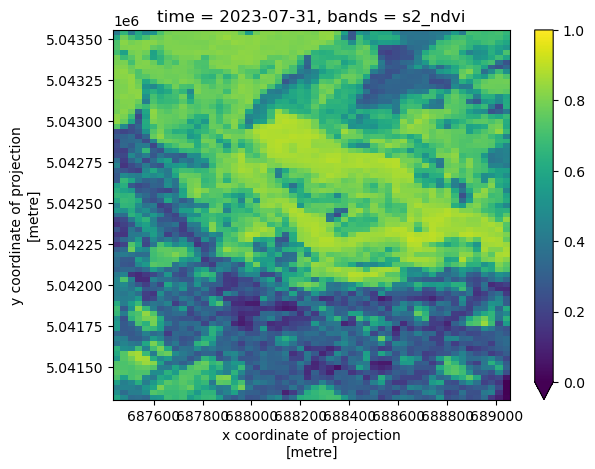

In [15]:
s2_l8_ndvi_xr[0,1].plot.imshow(vmin=0,vmax=1)

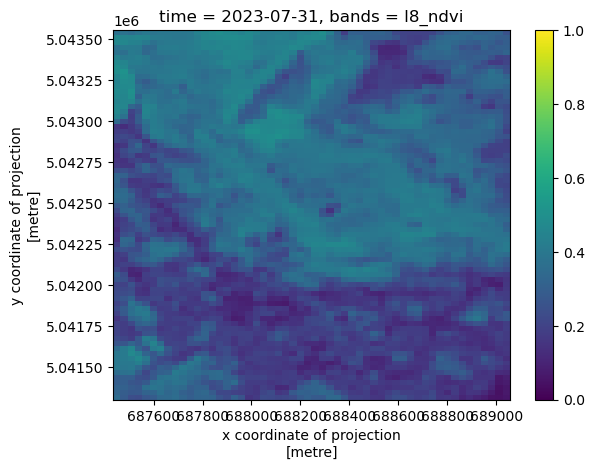

In [16]:
s2_l8_ndvi_xr[1,1].plot.imshow(vmin=0,vmax=1)